# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

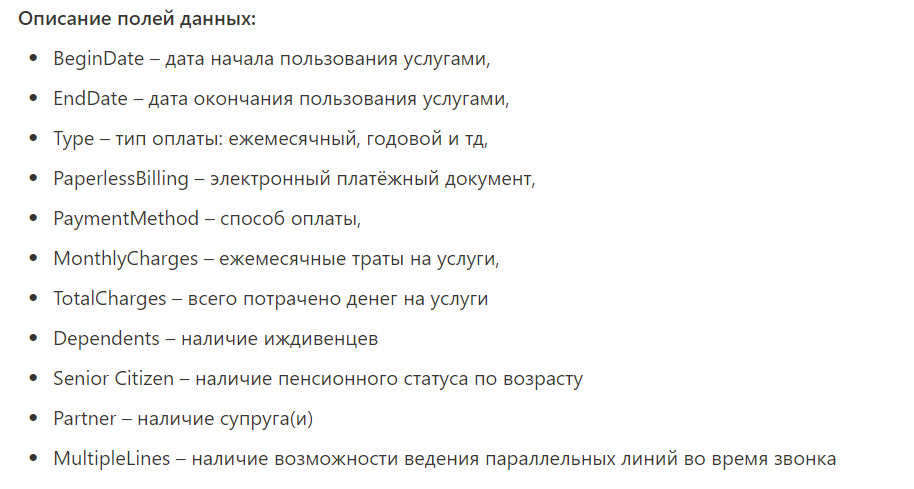

# План действий

- Загрузка и анализ данных
- Преобразование данных по результатам их анализа
- EDA - исследовательский анализ данных
- Подготовка данных для применения моделей
- Применение разных моделей
- Вывод на основе полученных результатов

# Загрузка и анализ данных

In [3]:
import pandas as pd
import os
from IPython.display import Markdown
import numpy as np

import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
from sklearn_evaluation import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

**Информация о выборке:**

In [4]:
def about_df(df):
    display(Markdown('**HEAD**'))
    display(df.head())
    print('\n')
    display(Markdown('**INFO**'))
    display(df.info())
    print('\n')
    display(Markdown('**ISNA**'))
    display(df.isna().sum())
    print('\n')
    display(Markdown('**DESCRIBE**'))
    display(df.describe())
    print('\n')
    display(Markdown('**CORR**'))
    display(df.corr())
    print('\n')
    display(Markdown('**DUPLICATES**'))
    print('Дубликаты =', df.duplicated().sum())

# `contract.csv` — информация о договоре

In [5]:
pth1 = '/datasets/final_provider/contract.csv'
pth2 = '/Users/Саркисян Александр/Desktop/practicum_ds/final/final_provider/contract.csv'
pth3 = '/Users/Alex/Desktop/practicum_ds/final/final_provider/contract.csv'

if os.path.exists(pth1):
    contract = pd.read_csv(pth1)
elif os.path.exists(pth2):
    contract = pd.read_csv(pth2)
elif os.path.exists(pth3):
    contract = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [6]:
about_df(contract)

**HEAD**

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


**INFO**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

**ISNA**

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**DESCRIBE**

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


**CORR**

,MonthlyCharges
MonthlyCharges,1.0


**DUPLICATES**

Дубликаты = 0


In [7]:
# проверим на уникальность пользователей
contract['customerID'].is_unique

True

# Файл contact:

**Всего строк** - 7043

**Пропусков** - нет

**Дубликатов** - нет

**Целевой признак:**
- EndDate

**Кодирование:**
- OHE

  **Признаки:**
  - Type
  - PaperlessBilling
  - PaymentMethod

**Изменене типа:**
- float

  **Признаки:**
  - TotalCharges
  
  
- datetime

  **Признаки:**
  - BeginDate
  - EndDate т.к. в условии задания указано, что "Информация о договорах актуальна на 1 февраля 2020", то значение No можно заменить на дату 01.02.2020, после создания целевого признака
  
**Соблюдение требований к стилю в названии колонок:**
  - Отсутствие пробелов - да.
  - Использован CamelCase - да, кроме столбца customerID.

# `personal.csv` — персональные данные клиента

In [8]:
pth1 = '/datasets/final_provider/personal.csv'
pth2 = '/Users/Саркисян Александр/Desktop/practicum_ds/final/final_provider/personal.csv'
pth3 = '/Users/Alex/Desktop/practicum_ds/final/final_provider/personal.csv'

if os.path.exists(pth1):
    personal = pd.read_csv(pth1)
elif os.path.exists(pth2):
    personal = pd.read_csv(pth2)
elif os.path.exists(pth3):
    personal = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [9]:
about_df(personal)

**HEAD**

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


**INFO**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

**ISNA**

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

**DESCRIBE**

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**CORR**

,SeniorCitizen
SeniorCitizen,1.0


**DUPLICATES**

Дубликаты = 0


# Файл personal:

**Всего строк** - 7043

**Пропусков** - нет

**Дубликатов** - нет

**Кодирование:**
- OHE

  **Признаки:**
  - gender
  - Partner
  - Dependents
  
**Соблюдение требований к стилю в названии колонок:**
  - Отсутствие пробелов - да.
  - Использован CamelCase - да, кроме столбца customerID, gender.

# `internet.csv` — информация об интернет-услугах

In [10]:
pth1 = '/datasets/final_provider/internet.csv'
pth2 = '/Users/Саркисян Александр/Desktop/practicum_ds/final/final_provider/internet.csv'
pth3 = '/Users/Alex/Desktop/practicum_ds/final/final_provider/internet.csv'

if os.path.exists(pth1):
    internet = pd.read_csv(pth1)
elif os.path.exists(pth2):
    internet = pd.read_csv(pth2)
elif os.path.exists(pth3):
    internet = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [11]:
about_df(internet)

**HEAD**

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


**INFO**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

**ISNA**

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**DESCRIBE**

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


**CORR**

""


**DUPLICATES**

Дубликаты = 0


# Файл internet:

**Всего строк** - 5517 Вероятнее всего 1526 (= 7043 - 5517) клиентов не пользуются интернет услугами

**Пропусков** - нет

**Дубликатов** - нет

**Кодирование:**
- OHE

  **Признаки:**
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  
**Соблюдение требований к стилю в названии колонок:**
  - Отсутствие пробелов - да.
  - Использован CamelCase - да, кроме столбца customerID.

# `phone.csv` — информация об услугах телефонии

In [12]:
pth1 = '/datasets/final_provider/phone.csv'
pth2 = '/Users/Саркисян Александр/Desktop/practicum_ds/final/final_provider/phone.csv'
pth3 = '/Users/Alex/Desktop/practicum_ds/final/final_provider/phone.csv'

if os.path.exists(pth1):
    phone = pd.read_csv(pth1)
elif os.path.exists(pth2):
    phone = pd.read_csv(pth2)
elif os.path.exists(pth3):
    phone = pd.read_csv(pth3)
else:
    print('Something is wrong')

In [13]:
about_df(phone)

**HEAD**

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


**INFO**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

**ISNA**

customerID       0
MultipleLines    0
dtype: int64

**DESCRIBE**

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


**CORR**

""


**DUPLICATES**

Дубликаты = 0


# Файл phone:

**Всего строк** - 6361 Вероятнее всего 682 (= 7043 - 6361) клиентов не пользуются интернет услугами

**Пропусков** - нет

**Дубликатов** - нет

**Кодирование:**
- OHE

  **Признаки:**
  - MultipleLines
  
**Соблюдение требований к стилю в названии колонок:**
  - Отсутствие пробелов - да.
  - Использован CamelCase - да, кроме столбца customerID.

# Вывод:

**Задача:** создать модель прогнозирования оттока клиентов.

**Целевой признак:** Exited будет создан на основе данных EndDate дата окончания договора:
- if EndDate = No (действующий клиент), то Exited = 0
- else (ушедший клиент), то Exited = 1 

**Решается задача бинарной классификации**

# Преобразование данных по результатам их анализа

In [14]:
# Создадим целевой признак Exited на основе EndDate:
# if EndDate = No (действующий клиент), то Exited = 0
# else (ушедший клиент), то Exited = 1 
contract['Exited'] = (contract['EndDate'] != 'No')*1
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [15]:
# замена No в EndDate на 01.02.2020, чтобы далее расчитать количество дней пользования услугами клиентом
contract['EndDate'] = contract['EndDate'].replace(['No'], ['2020-02-01'])
contract[contract['EndDate'] == 'No']['EndDate'].count()

0

In [16]:
# Изменение типа EndDate и BeginDate в формат даты
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Exited            7043 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 467.8+ KB


In [17]:
# создадим признак DaysUse (количество дней пользования), как разницу между EndDate - BeginDate
contract['DaysUse'] = (contract['EndDate'] - contract['BeginDate']).dt.days

In [18]:
# переведем TotalCharges в float
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors ='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7043 non-null   int32         
 9   DaysUse           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(4)
memory usage: 522.8+ KB


**`errors='coerce' — некорректные значения принудительно были заменены на NaN**

In [19]:
contract[contract['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,DaysUse
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


Это клиенты, которые были подключены последним днем выборки, поэтому нет инфо в столбце TotalCharges.

In [20]:
# Исходя из вышесказанного можно заменить эти данные на ноль, т.к. этим клиентам не успели начислить расходы.
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)
contract['TotalCharges'].isnull().sum()

0

In [21]:
# cоздадим единный DataFrame на базе таблицы contract:
merged_df = contract.merge(
    personal, how='left', on='customerID').merge(
    internet, how='left', on='customerID').merge(
    phone, how='left', on='customerID')

In [22]:
# приведем столбец customerID и gender к формату CamelCase:
merged_df = merged_df.rename(columns={'customerID': 'CustomerID'})
merged_df = merged_df.rename(columns={'gender': 'Gender'})

In [23]:
about_df(merged_df)

**HEAD**

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,DaysUse,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,...,No,No,Fiber optic,No,No,No,No,No,No,No


**INFO**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Exited            7043 non-null   int32         
 9   DaysUse           7043 non-null   int64         
 10  Gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

None

**ISNA**

CustomerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Exited                 0
DaysUse                0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

**DESCRIBE**

,MonthlyCharges,TotalCharges,Exited,DaysUse,SeniorCitizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.265370,985.996166,0.162147
std,30.090047,2266.794470,0.441561,747.587844,0.368612
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,273.000000,0.000000
50%,70.350000,1394.550000,0.000000,883.000000,0.000000
75%,89.850000,3786.600000,1.000000,1676.000000,0.000000
max,118.750000,8684.800000,1.000000,2191.000000,1.000000


**CORR**

,MonthlyCharges,TotalCharges,Exited,DaysUse,SeniorCitizen
MonthlyCharges,1.000000,0.651174,0.193356,0.247754,0.220173
TotalCharges,0.651174,1.000000,-0.198324,0.826109,0.103006
Exited,0.193356,-0.198324,1.000000,-0.352673,0.150889
DaysUse,0.247754,0.826109,-0.352673,1.000000,0.016514
SeniorCitizen,0.220173,0.103006,0.150889,0.016514,1.000000


**DUPLICATES**

Дубликаты = 0


In [24]:
# Вероятной причиной наличия пропусков в признаках с услугами в таблице merged_df это не пользование данными услугами.
# Следовательно заменим эти пропуски на No
for column in ('InternetService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'MultipleLines'):
    merged_df[column] = merged_df[column].fillna('No')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Exited            7043 non-null   int32         
 9   DaysUse           7043 non-null   int64         
 10  Gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   7043 n

# EDA - исследовательский анализ данных

,Exited,MonthlyCharges,TotalCharges,DaysUse
Exited,1.000000,0.193356,-0.198324,-0.352673
MonthlyCharges,0.193356,1.000000,0.651174,0.247754
TotalCharges,-0.198324,0.651174,1.000000,0.826109
DaysUse,-0.352673,0.247754,0.826109,1.000000


Доля оставшихся клиентов 73 %


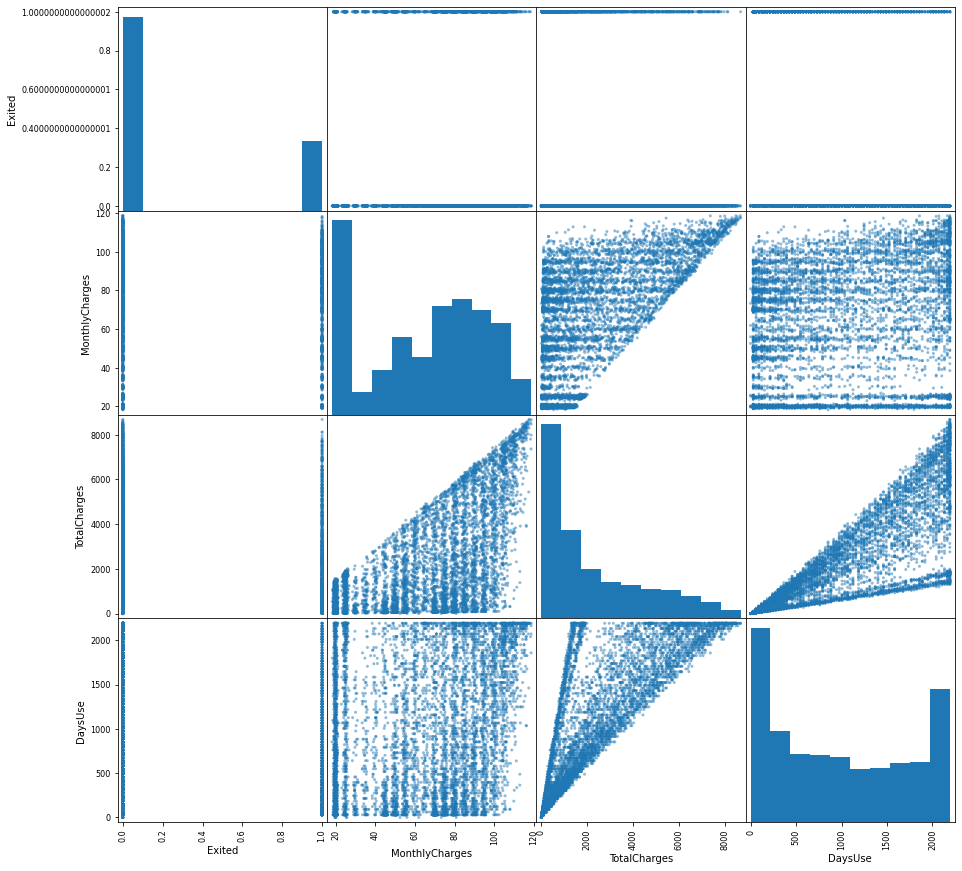

In [25]:
pd.plotting.scatter_matrix(merged_df[['Exited',
                                      'MonthlyCharges',
                                      'TotalCharges',
                                      'DaysUse']], figsize=(15, 15));
display(merged_df[['Exited',
                   'MonthlyCharges',
                   'TotalCharges',
                   'DaysUse']].corr())

print('Доля оставшихся клиентов', round((contract['Exited'] == 0).sum() * 100 / len(contract['Exited'])), '%')

- корреляция между TotalCharges&DaysUse - 0.82, т.е. чем дольше клиент платит, тем больше сумма всех затрат нарастающим итогом
- корреляция между TotalCharges&MonthlyCharges - 0.62, т.е. чем выше ежемесячные траты, тем больше сумма всех затрат нарастающим итогом
- высокая корреляция приведет к проблеме мультиколлениарности поэтому TotalCharges подлежит удалению

- Существенный дисбаланс классов. 73% выборок приходится на значение 0 в целевом признаке.
- MonthlyCharges 2 пика на минимуме 20 и около 80-90
- TotalCharges убывают
- DaysUse 2 пика среди новых клиентов и долгожителей

**Распределение значений в категориальных признаках**

In [26]:
categorial_columns = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
    'Gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'MultipleLines']

for column in categorial_columns:
    print(column)
    print('\n')
    print(merged_df[column].value_counts(normalize=True).map('{:.2%}'.format))
    print('\n')

Type


Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: Type, dtype: object


PaperlessBilling


Yes    59.22%
No     40.78%
Name: PaperlessBilling, dtype: object


PaymentMethod


Electronic check             33.58%
Mailed check                 22.89%
Bank transfer (automatic)    21.92%
Credit card (automatic)      21.61%
Name: PaymentMethod, dtype: object


Gender


Male      50.48%
Female    49.52%
Name: Gender, dtype: object


SeniorCitizen


0    83.79%
1    16.21%
Name: SeniorCitizen, dtype: object


Partner


No     51.70%
Yes    48.30%
Name: Partner, dtype: object


Dependents


No     70.04%
Yes    29.96%
Name: Dependents, dtype: object


InternetService


Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: InternetService, dtype: object


OnlineSecurity


No     71.33%
Yes    28.67%
Name: OnlineSecurity, dtype: object


OnlineBackup


No     65.51%
Yes    34.49%
Name: OnlineBackup, dtype: object


DeviceProtection


No     6

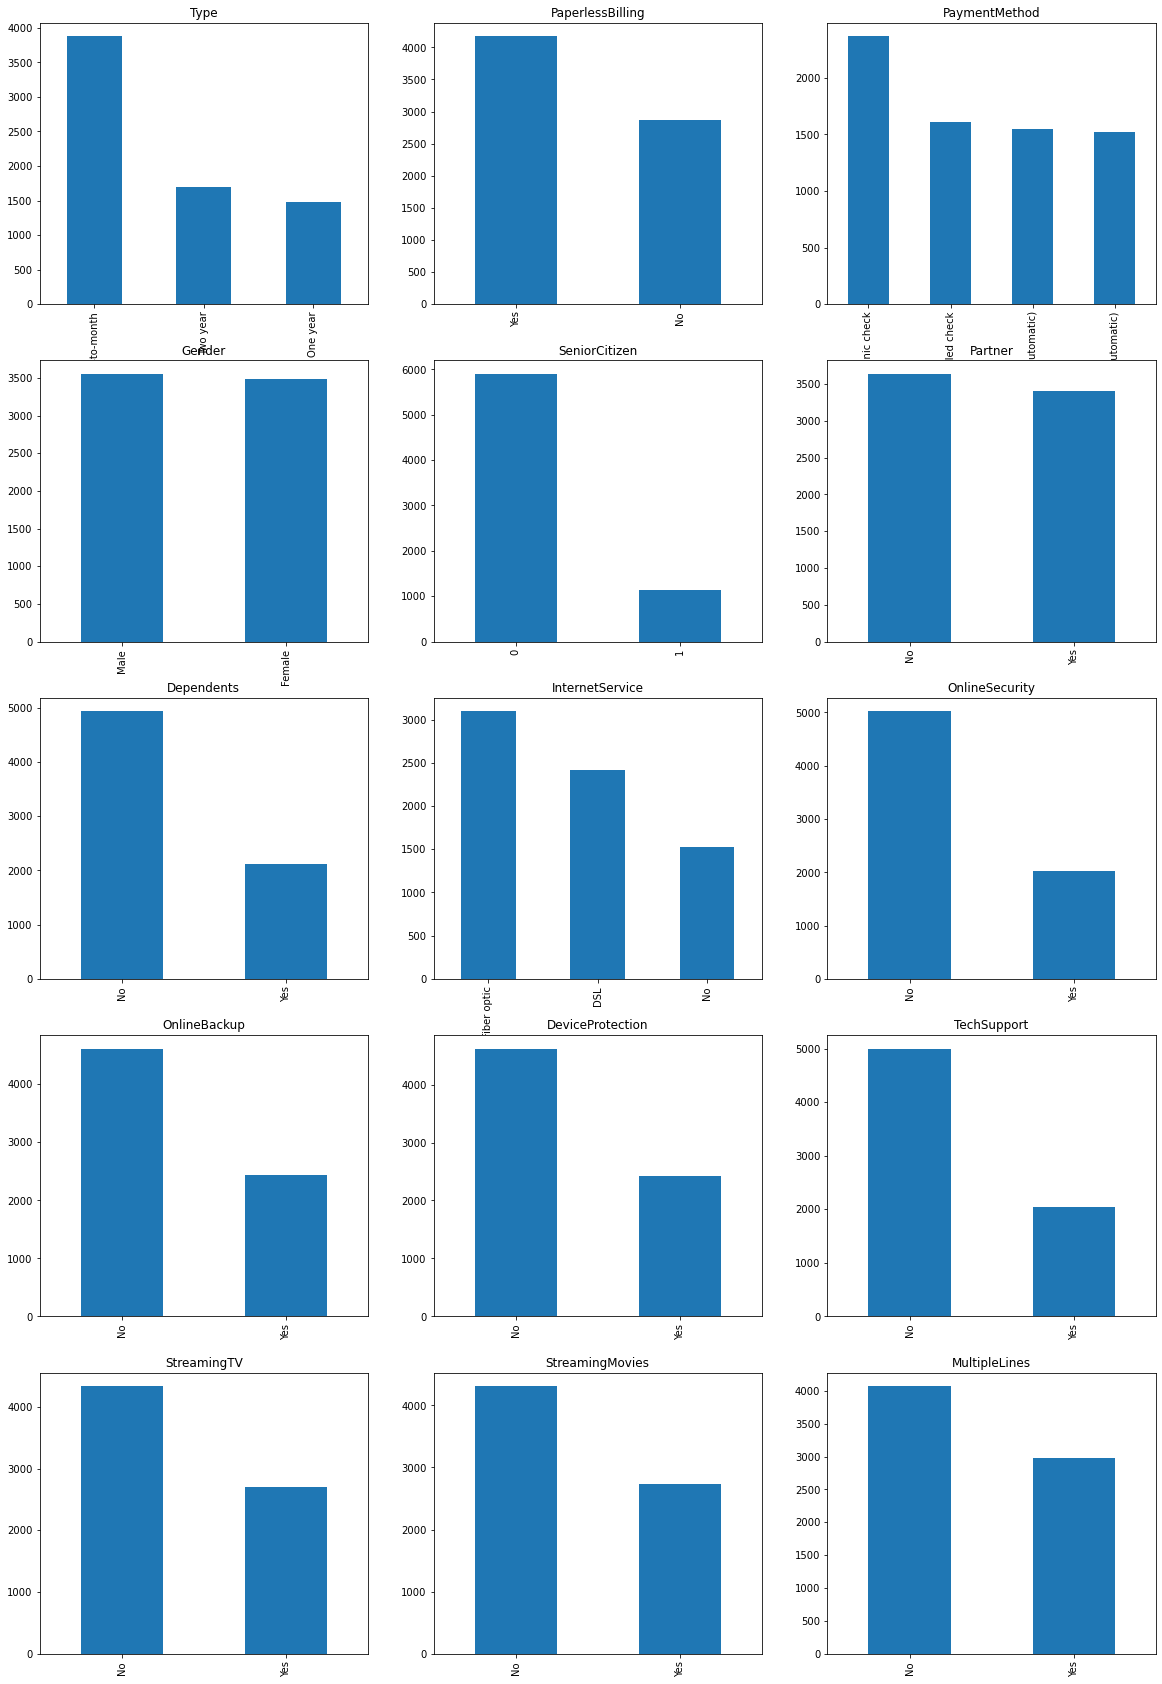

In [27]:
ncols = 3
nrows = 5

plt.figure(figsize=(20, 30))

for index, column in enumerate(categorial_columns):
    ax = plt.subplot(nrows, ncols, index + 1)
    merged_df[column].value_counts().plot(kind='bar',
                                          title=column,
                                          ax=ax)
        
plt.show()

**Описание полученных значений в категориальных признаках:**
- Тип оплаты - ежемесячный
- Оплата через электронный платежный документ
- Способ оплаты Electronic check
- Gender & Partner 50/50
- Большинство пользователей не пенсионного возраста 84%
- Большинство пользователей без иждевенцев 70%
- InternetService тип подключения Fiber optic
- Услуги OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines в более чем 57% не используются

# Подготовка данных для применения моделей

In [28]:
# удаление столбцов BeginDate, EndDate, TotalCharges
del merged_df['BeginDate'], merged_df['EndDate'], merged_df['TotalCharges']

In [29]:
# устанока CustomerID в качестве индекса
merged_df = merged_df.set_index('CustomerID')

In [30]:
merged_df.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,Exited,DaysUse,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
5575-GNVDE,One year,No,Mailed check,56.95,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


**Формирование выборок:**

- обучающая 75%
- тестовая 25% для теста лучшей модели.
- random state = 120922

In [31]:
df_train, df_test = train_test_split(
    merged_df,
    test_size=0.25,
    random_state=120922,
    stratify=merged_df['Exited'])

In [32]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [33]:
# Кодирование OHE преобразование категориальных признаков в численные
features_train = pd.get_dummies(features_train, drop_first=True)
features_train.head()

,MonthlyCharges,DaysUse,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_Male,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
CustomerID,,,,,,,,,,,,,,,,,,,,,
7643-RCHXS,19.35,1918,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
8019-ENHXU,99.45,1279,0,0,0,1,0,1,0,1,...,0,1,0,0,1,1,1,0,1,1
3714-JTVOV,74.15,1279,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4685-ERGHK,86.90,1737,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
6683-VLCTZ,98.55,609,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,1,1


In [34]:
# Кодирование OHE преобразование категориальных признаков в численные
features_test = pd.get_dummies(features_test, drop_first=True)
features_test.head()

,MonthlyCharges,DaysUse,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Gender_Male,...,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
CustomerID,,,,,,,,,,,,,,,,,,,,,
2400-XIWIO,90.10,2163,0,0,1,0,0,1,0,0,...,0,0,0,1,1,1,1,1,1,1
2272-UOINI,78.50,215,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,1,1,1,0
7240-FQLHE,99.75,549,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,1
2074-GKOWZ,89.55,61,0,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,1,1,0
4177-JPDFU,34.00,365,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0


**Масштабирование признаков**

In [35]:
# численные признаки
numeric = ['MonthlyCharges', 'DaysUse']

In [36]:
# Создадим объект этой структуры и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [37]:
# Преобразуем обучающую и тестовую выборки функцией transform().
features_train_scaled = features_train.copy()
features_train_scaled[numeric] = scaler.transform(features_train[numeric])

features_test_scaled = features_test.copy()
features_test_scaled[numeric] = scaler.transform(features_test[numeric])

print(features_train_scaled.shape)
print(features_test_scaled.shape) 

(5282, 21)
(1761, 21)


# Применение разных моделей

**LogisticRegression**

In [38]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000]}

lr_model = LogisticRegression()

lr_gs = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc')
lr_gs.fit(features_train_scaled, target_train)

print(lr_gs.best_params_)

{'C': 10}


AUC-ROC score 0.846
Accuracy score 0.803


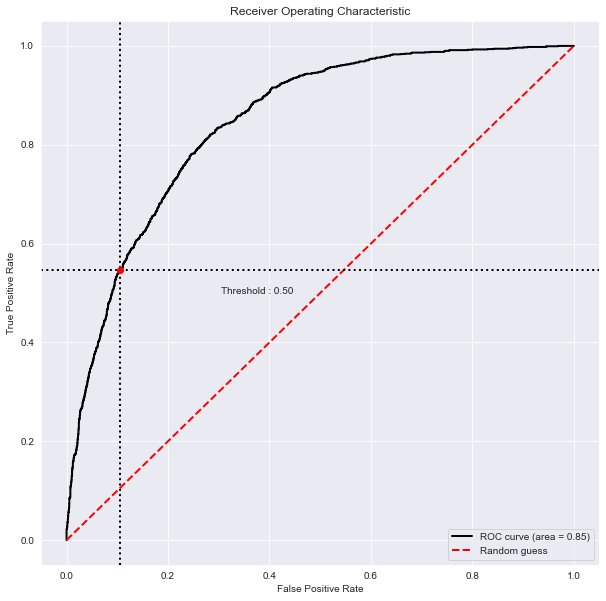

In [39]:
lr_predicted_probalities = lr_gs.best_estimator_.predict_proba(features_train_scaled)[:, 1]
print('AUC-ROC score', roc_auc_score(target_train, lr_predicted_probalities).round(3))
lr_prediction = lr_gs.best_estimator_.predict(features_train_scaled)
print('Accuracy score', accuracy_score(target_train, lr_prediction).round(3))
bc = BinaryClassification(target_train, lr_predicted_probalities, labels=["Class 1", "Class 2"])

plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

**RandomForestClassifier**

In [40]:
param_grid = {'max_depth': [5, 10, 20],
              'n_estimators': [50, 100, 200]}

rf_model = RandomForestClassifier(random_state=120922, class_weight='balanced')

rf_gs = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
rf_gs.fit(features_train_scaled, target_train)

print(rf_gs.best_params_)

{'max_depth': 10, 'n_estimators': 200}


AUC-ROC score 0.946
Accuracy score 0.86


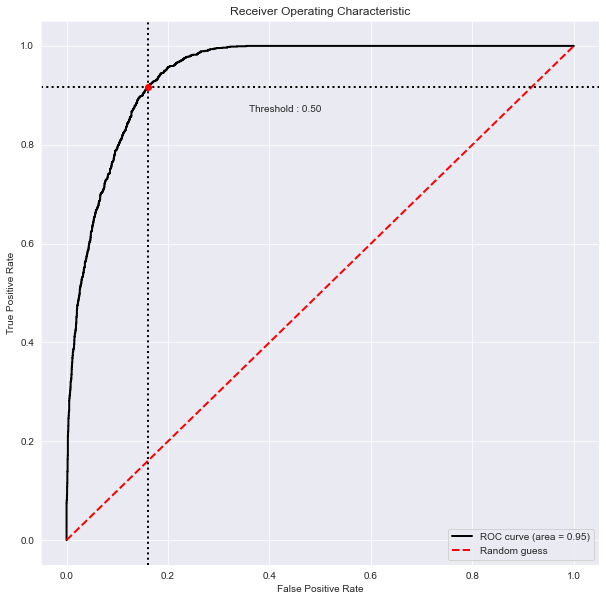

In [41]:
rf_predicted_probalities = rf_gs.best_estimator_.predict_proba(features_train_scaled)[:, 1]
print('AUC-ROC score', roc_auc_score(target_train, rf_predicted_probalities).round(3))
rf_prediction = rf_gs.best_estimator_.predict(features_train_scaled)
print('Accuracy score', accuracy_score(target_train, rf_prediction).round(3))
bc = BinaryClassification(target_train, rf_predicted_probalities, labels=["Class 1", "Class 2"])

plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

**LGBMClassifier**

In [42]:
param_grid = {'max_depth': [5, 10, 20],
              'n_estimators': [50, 100, 200]}

lc_model = LGBMClassifier(random_state=120922, class_weight='balanced')

lc_gs = GridSearchCV(lc_model, param_grid, cv=5, scoring='roc_auc')
lc_gs.fit(features_train_scaled, target_train)

print(lc_gs.best_params_)

{'max_depth': 5, 'n_estimators': 200}


AUC-ROC score 0.974
Accuracy score 0.898


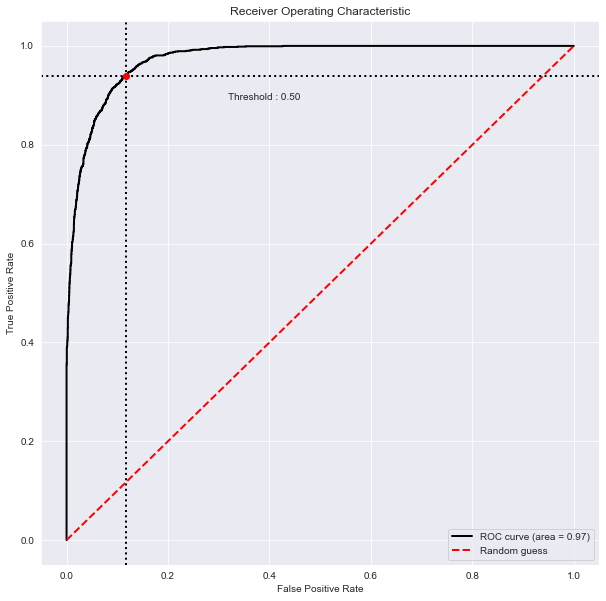

In [43]:
lc_predicted_probalities = lc_gs.best_estimator_.predict_proba(features_train_scaled)[:, 1]
print('AUC-ROC score', roc_auc_score(target_train, lc_predicted_probalities).round(3))
lc_prediction = lc_gs.best_estimator_.predict(features_train_scaled)
print('Accuracy score', accuracy_score(target_train, lc_prediction).round(3))
bc = BinaryClassification(target_train, lc_predicted_probalities, labels=["Class 1", "Class 2"])

plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

**LGBMClassifier оказал лучший результат:**
Расчитаем метрики на тестовой выборке.

AUC-ROC score 0.91
Accuracy score 0.839


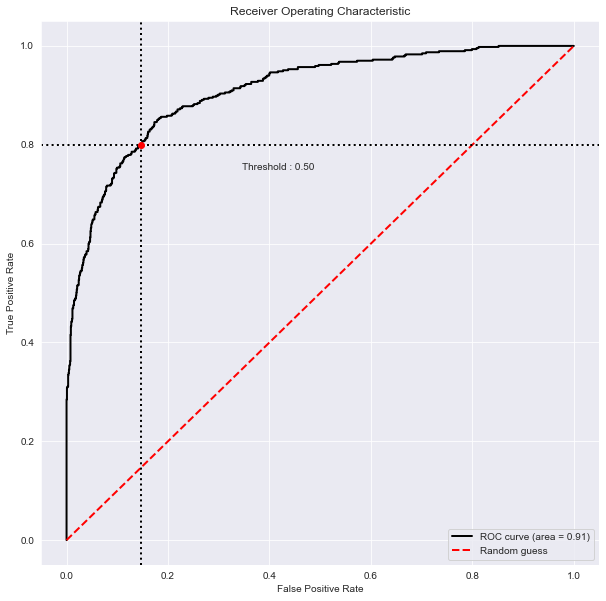

In [44]:
lc_predicted_probalities = lc_gs.best_estimator_.predict_proba(features_test_scaled)[:, 1]
print('AUC-ROC score', roc_auc_score(target_test, lc_predicted_probalities).round(3))
lc_prediction = lc_gs.best_estimator_.predict(features_test_scaled)
print('Accuracy score', accuracy_score(target_test, lc_prediction).round(3))
bc = BinaryClassification(target_test, lc_predicted_probalities, labels=["Class 1", "Class 2"])

plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

**Анализ важности признаков**

,share
DaysUse,40.57
MonthlyCharges,27.51
PaymentMethod_Electronic check,2.97
Gender_Male,2.76
SeniorCitizen,2.66
InternetService_Fiber optic,2.17
Dependents_Yes,1.99
OnlineSecurity_Yes,1.94
Type_Two year,1.86
PaperlessBilling_Yes,1.86


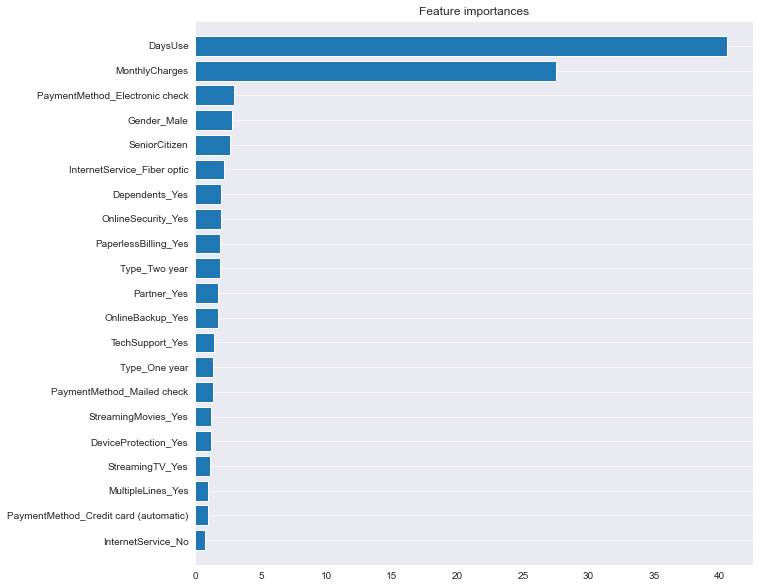

In [45]:
feature_importances = lc_gs.best_estimator_.feature_importances_*100/sum(lc_gs.best_estimator_.feature_importances_)
feature_names = features_test_scaled.columns.tolist()
plt.figure(figsize=(10,10))
plot.feature_importances(feature_importances, feature_names=feature_names);

display(pd.DataFrame(feature_importances,
                     index = feature_names,
                     columns=['share']).sort_values('share', ascending=False).round(2))

**Наиболее значимыми признаками являются:**

- DaysUse - количество дней пользования
- MonthlyCharges - ежемесячные траты

# Отчет о проделанной работе:

**С помощью LGBMClassifier создана модель прогнозирования оттока клиентов.**

Значение метрик на тестовой модели


- AUC-ROC score 0.91
- Accuracy score 0.839

Гиперпараметры лучшей модели:


    - random_state=120922,
    - 'max_depth': 5,
    - 'n_estimators': 200

    
- Признаки использованные для построения модели:


    - числовые (они же оказались наиболее значимыми признаками):
        
        - DaysUse количество дней пользования, этот признак был вычеслен как разница между EndDate - BeginDate
        - MonthlyCharges ежемесячные траты на услуги
             
    - категориальные:
            
        - PaymentMethod метод оплаты
        - Gender пол
        - SeniorCitizen пенсионный статус
        - InternetService услуги интернет провайдера
        - Dependents наличие иждевенцев
        - OnlineSecurity онлайн защита
        - Type тип оплаты: ежемесячный, годовой
        - PaperlessBilling электронная форма оплаты
        - Partner наличие супруга(ги)
        - OnlineBackup услуга онлайн резервного копирования 
        - TechSupport услуга тех поддержки
        - DeviceProtection услуга защиты устройства
        - StreamingMovies услуга потокового просмотра фильмов
        - StreamingTV услуга потокового просмотра тв
        - MultipleLines услуга ведения паралельной линии во премя звонка
        
- Признаки которые были удалены:


    - TotalCharges всего потрачено денег на услуги, по причине мультиколлениарности с целевым признаком.
    - EndDate, BeginDate как упомяналось выше на их базе был вычеслен признак DaysUse
        
**Одним из тонких моментов в данной работе является определение причины наличия пропусков (в признаках с услугами) в обьединенной таблице, что в итоге было интерпритировано как не пользование данными услугами и заменено на значение No.**


**Все пункты заявленного Плана действий были выполнены**

  
    
**Работа проводилась в следующем порядке:**

- Загрузка и анализ данных по каждой таблице, по результатам были определены основные характеристики данных и необходимые преобразования в т.ч.:


    - Всего строк
    - Наличие пропусков
    - Наличие дубликатов
    - Целевой признак
    - Вид и признаки кодирования
    - В каких признаках необходимо изменение типа
    - Соблюдение требований к стилю в названии колонок


- Преобразование данных по результатам их анализа


    - создан целевой признак Exited на основе EndDate, где Exited = 0 (действующий клиент), а Exited = 1 (ушедший клиент):
    - создан признак DaysUse (количество дней пользования), как разницу между EndDate - BeginDate
    - cоздан единный DataFrame (merged_df) на базе таблицы contract
    
- EDA - исследовательский анализ данных выявлены следующие зависимости


    - корреляция между TotalCharges&DaysUse - 0.82, т.е. чем дольше клиент платит, тем больше сумма всех затрат нарастающим итогом
    - корреляция между TotalCharges&MonthlyCharges - 0.62, т.е. чем выше ежемесячные траты, тем больше сумма всех затрат нарастающим итогом
    - высокая корреляция приведет к проблеме мультиколлениарности поэтому TotalCharges будет удален

- Подготовка данных для применения моделей

    
    - Сформированы выбороки: обучающая 75%, тестовая 25% для теста лучшей модели
    - Кодирование OHE (преобразование категориальных признаков в численные)
    - Масштабирование признаков на обучающей выборке
    

- Применены следующие модели:


    - LogisticRegression
    - RandomForestClassifier
    - LGBMClassifier - показала наилучший результат